# Introduction

The aim of this project is to analyze the data provided by UNESCO on recognized World Heritage sites. This data refers to the time period from 1978 to 2021.

As a first step, I download the xls file with the list of UNESCO sites.

Data source: https://whc.unesco.org/en/faq/126.


In [69]:
#load libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tabulate
import folium
import warnings

warnings.filterwarnings('ignore')

In [70]:
#load data
df = pd.read_excel("whc-sites-2021.xls")
df.head()

,unique_number,id_no,rev_bis,name_en,name_fr,short_description_en,short_description_fr,justification_en,justification_fr,date_inscribed,...,criteria_txt,category,category_short,states_name_en,states_name_fr,region_en,region_fr,iso_code,udnp_code,transboundary
0,230,208,Rev,Cultural Landscape and Archaeological Remains ...,Paysage culturel et vestiges archéologiques de...,<p>The cultural landscape and archaeological r...,<p>Le paysage culturel et les vestiges archéol...,<p><em>Criterion (i):</em> The Buddha statues ...,<p><em>Critère (i):</em> Les statues de Bouddh...,2003,...,(i)(ii)(iii)(iv)(vi),Cultural,C,Afghanistan,Afghanistan,Asia and the Pacific,Asie et Pacifique,af,afg,0
1,234,211,Rev,Minaret and Archaeological Remains of Jam,Minaret et vestiges archéologiques de Djam,"<p>The 65m-tall Minaret of Jam is a graceful, ...","<p>Haut de 65m, le minaret de Djam est une con...",<p><em>Criterion (ii):</em> The innovative arc...,<p><em>Critère (ii)</em> : L'architecture et l...,2002,...,(ii)(iii)(iv),Cultural,C,Afghanistan,Afghanistan,Asia and the Pacific,Asie et Pacifique,af,afg,0
2,1590,569,Bis,Historic Centres of Berat and Gjirokastra,Centres historiques de Berat et de Gjirokastra,<p>Berat and Gjirokastra are inscribed as rare...,<p>Berat et Gjirokastra sont inscrites en tant...,NaN,NaN,2005,...,(iii)(iv),Cultural,C,Albania,Albanie,Europe and North America,Europe et Amérique du Nord,al,alb,0
3,1563,570,ter,Butrint,Butrint,"<p>Inhabited since prehistoric times, Butrint ...","<p>Habité depuis les temps préhistoriques, le ...",NaN,NaN,1992,...,(iii),Cultural,C,Albania,Albanie,Europe and North America,Europe et Amérique du Nord,al,alb,0
4,111,102,NaN,Al Qal'a of Beni Hammad,La Kalâa des Béni Hammad,<p>In a mountainous site of extraordinary beau...,<p>Dans un site montagneux d&rsquo;une saisiss...,NaN,NaN,1980,...,(iii),Cultural,C,Algeria,Algérie,Arab States,États arabes,dz,dza,0


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1154 entries, 0 to 1153
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_number         1154 non-null   int64  
 1   id_no                 1154 non-null   int64  
 2   rev_bis               263 non-null    object 
 3   name_en               1154 non-null   object 
 4   name_fr               1154 non-null   object 
 5   short_description_en  1154 non-null   object 
 6   short_description_fr  1154 non-null   object 
 7   justification_en      332 non-null    object 
 8   justification_fr      326 non-null    object 
 9   date_inscribed        1154 non-null   int64  
 10  secondary_dates       89 non-null     object 
 11  danger                1154 non-null   int64  
 12  date_end              40 non-null     float64
 13  danger_list           88 non-null     object 
 14  longitude             1154 non-null   float64
 15  latitude             

# Data Cleaning

First of all, I eliminate the columns containing information in French, as they are redundant.

In [72]:
df_1=df.loc[:,~df.columns.str.contains('_fr', case=False)]


In [73]:
df_1.head()

,unique_number,id_no,rev_bis,name_en,short_description_en,justification_en,date_inscribed,secondary_dates,danger,date_end,...,N9,N10,criteria_txt,category,category_short,states_name_en,region_en,iso_code,udnp_code,transboundary
0,230,208,Rev,Cultural Landscape and Archaeological Remains ...,<p>The cultural landscape and archaeological r...,<p><em>Criterion (i):</em> The Buddha statues ...,2003,NaN,1,NaN,...,0,0,(i)(ii)(iii)(iv)(vi),Cultural,C,Afghanistan,Asia and the Pacific,af,afg,0
1,234,211,Rev,Minaret and Archaeological Remains of Jam,"<p>The 65m-tall Minaret of Jam is a graceful, ...",<p><em>Criterion (ii):</em> The innovative arc...,2002,NaN,1,NaN,...,0,0,(ii)(iii)(iv),Cultural,C,Afghanistan,Asia and the Pacific,af,afg,0
2,1590,569,Bis,Historic Centres of Berat and Gjirokastra,<p>Berat and Gjirokastra are inscribed as rare...,NaN,2005,2008,0,NaN,...,0,0,(iii)(iv),Cultural,C,Albania,Europe and North America,al,alb,0
3,1563,570,ter,Butrint,"<p>Inhabited since prehistoric times, Butrint ...",NaN,1992,1999,0,2005.0,...,0,0,(iii),Cultural,C,Albania,Europe and North America,al,alb,0
4,111,102,NaN,Al Qal'a of Beni Hammad,<p>In a mountainous site of extraordinary beau...,NaN,1980,NaN,0,NaN,...,0,0,(iii),Cultural,C,Algeria,Arab States,dz,dza,0


In [74]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1154 entries, 0 to 1153
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_number         1154 non-null   int64  
 1   id_no                 1154 non-null   int64  
 2   rev_bis               263 non-null    object 
 3   name_en               1154 non-null   object 
 4   short_description_en  1154 non-null   object 
 5   justification_en      332 non-null    object 
 6   date_inscribed        1154 non-null   int64  
 7   secondary_dates       89 non-null     object 
 8   danger                1154 non-null   int64  
 9   date_end              40 non-null     float64
 10  danger_list           88 non-null     object 
 11  longitude             1154 non-null   float64
 12  latitude              1154 non-null   float64
 13  area_hectares         1136 non-null   float64
 14  C1                    1154 non-null   int64  
 15  C2                   

I now select only the variables that I will need, i.e. those that concern the name, the category, the level of danger, the date of inclusion in the list of UNESCO sites and the date of elimination, in addition to the countries in which they are located, with relative values of latitude and longitude and whether the site is shared between two or more countries (transboundary).

In [75]:
df_2=df_1.iloc[:,[3,6,8,9,11,12,25,27,31]]

In [76]:
df_2.head()

,name_en,date_inscribed,danger,date_end,longitude,latitude,category,states_name_en,transboundary
0,Cultural Landscape and Archaeological Remains ...,2003,1,NaN,67.825250,34.846940,Cultural,Afghanistan,0
1,Minaret and Archaeological Remains of Jam,2002,1,NaN,64.515889,34.396417,Cultural,Afghanistan,0
2,Historic Centres of Berat and Gjirokastra,2005,0,NaN,20.140833,40.074167,Cultural,Albania,0
3,Butrint,1992,0,2005.0,20.020950,39.745732,Cultural,Albania,0
4,Al Qal'a of Beni Hammad,1980,0,NaN,4.786840,35.818440,Cultural,Algeria,0


In [77]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1154 entries, 0 to 1153
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name_en         1154 non-null   object 
 1   date_inscribed  1154 non-null   int64  
 2   danger          1154 non-null   int64  
 3   date_end        40 non-null     float64
 4   longitude       1154 non-null   float64
 5   latitude        1154 non-null   float64
 6   category        1154 non-null   object 
 7   states_name_en  1154 non-null   object 
 8   transboundary   1154 non-null   int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 81.3+ KB


The null values are in the "end_date" column. This means that there are 40 UNESCO sites, among all those registered between 1978 and 2021 that have been eliminated from the list over the years. So I'm keeping the dataset as it is, for now.

#Data Analysis

How many sites per country?

In [78]:
sites_tot=len(df_2)
print(f"The total number of registered Unesco Sites in the period of time 1978-2021 are {sites_tot}.")

The total number of registered Unesco Sites in the period of time 1978-2021 are 1154.


Let's updated the list to 2021.

In [79]:
#remove the 40 sites that are not Unesco Sites anymore

df_end=df_2.loc[~df_2.date_end.notnull(),:]

df_end=df_end.drop(['date_end'], axis=1)

#df_end.info()

In [80]:
sites_tot2=len(df_end)
print(f"In 2021 there were {sites_tot2} Unesco sites.")

In 2021 there were 1114 Unesco sites.


Among those, some belong to a single country, others are shared between 2 or more countries.

In [81]:
tab_shared=df_end['transboundary'].value_counts().to_frame().reset_index().rename(columns={'index':'Sharing', 'transboundary':'Count'})


map1={0:'Not shared', 1:'Shared'}
tab_shared['Sharing']=tab_shared['Sharing'].map(map1)
tab_shared

,Sharing,Count
0,Not shared,1071
1,Shared,43


Count of Unesco sites for each country.


In [82]:
df_split=(df_end.set_index(df_end.columns.drop('states_name_en',1).tolist())
.states_name_en.str.split(',', expand=True)
.stack()
.reset_index()
.rename(columns={0:'states_name_en'})
.loc[:, df_end.columns]
 )


In [83]:
#creo una nuova colonna con il numero totale di siti Unesco per ogni Paese

df_split['count_sites'] = df_split.groupby('states_name_en')['states_name_en'].transform('count')
df_split

,name_en,date_inscribed,danger,longitude,latitude,category,states_name_en,transboundary,count_sites
0,Cultural Landscape and Archaeological Remains ...,2003,1,67.825250,34.846940,Cultural,Afghanistan,0,2
1,Minaret and Archaeological Remains of Jam,2002,1,64.515889,34.396417,Cultural,Afghanistan,0,2
2,Historic Centres of Berat and Gjirokastra,2005,0,20.140833,40.074167,Cultural,Albania,0,3
3,Al Qal'a of Beni Hammad,1980,0,4.786840,35.818440,Cultural,Algeria,0,6
4,Tassili n'Ajjer,1982,0,9.000000,25.500000,Mixed,Algeria,0,6
...,...,...,...,...,...,...,...,...,...
1203,Prehistoric Rock Art Sites in the Côa Valley a...,1998,0,-6.661111,40.697500,Cultural,Spain,1,49
1204,Heritage of Mercury. Almadén and Idrija,2012,0,-4.838889,38.775278,Cultural,Slovenia,1,5
1205,Heritage of Mercury. Almadén and Idrija,2012,0,-4.838889,38.775278,Cultural,Spain,1,49
1206,Mosi-oa-Tunya / Victoria Falls,1989,0,25.855390,-17.924530,Natural,Zambia,1,1


In [84]:
df_split.sort_values(by=['count_sites'], ascending=False)

,name_en,date_inscribed,danger,longitude,latitude,category,states_name_en,transboundary,count_sites
511,City of Verona,2000,0,10.993889,45.438611,Cultural,Italy,0,58
505,Historic Centre of Naples,1995,0,14.262778,40.851389,Cultural,Italy,0,58
516,"Cathedral, Torre Civica and Piazza Grande, Modena",1997,0,10.925680,44.646240,Cultural,Italy,0,58
515,"Portovenere, Cinque Terre, and the Islands (Pa...",1997,0,9.729170,44.106940,Cultural,Italy,0,58
514,Archaeological Area and the Patriarchal Basili...,1998,0,13.367500,45.768333,Cultural,Italy,0,58
...,...,...,...,...,...,...,...,...,...
276,Levuka Historical Port Town,2013,0,178.834533,-17.683378,Cultural,Fiji,0,1
620,Bikini Atoll Nuclear Test Site,2010,0,165.380556,11.600000,Cultural,Marshall Islands,0,1
266,Asmara: A Modernist African City,2017,0,38.935833,15.335278,Cultural,Eritrea,0,1
265,Joya de Cerén Archaeological Site,1993,0,-89.369167,13.827500,Cultural,El Salvador,0,1


Top 5 countries per number of Unesco sites.

In [85]:
group_count=df_split.groupby(["states_name_en", "count_sites"] , as_index = False).sum().sort_values(by='count_sites',ascending=False)

Table0=pd.DataFrame(group_count, columns=['states_name_en','count_sites'])
blankIndex=[''] * len(Table0)
Table0.index=blankIndex
Table0.set_axis(['Country/Countries', 'Number of Unesco Sites'], axis='columns', inplace=True)
Table0


,Country/Countries,Number of Unesco Sites
,Italy,58
,China,56
,Germany,50
,Spain,49
,France,49
...,...,...
,Solomon Islands,1
,Micronesia (Federated States of),1
,Cabo Verde,1
,El Salvador,1


Let's visualize the countries with at least 10 Unesco sites.

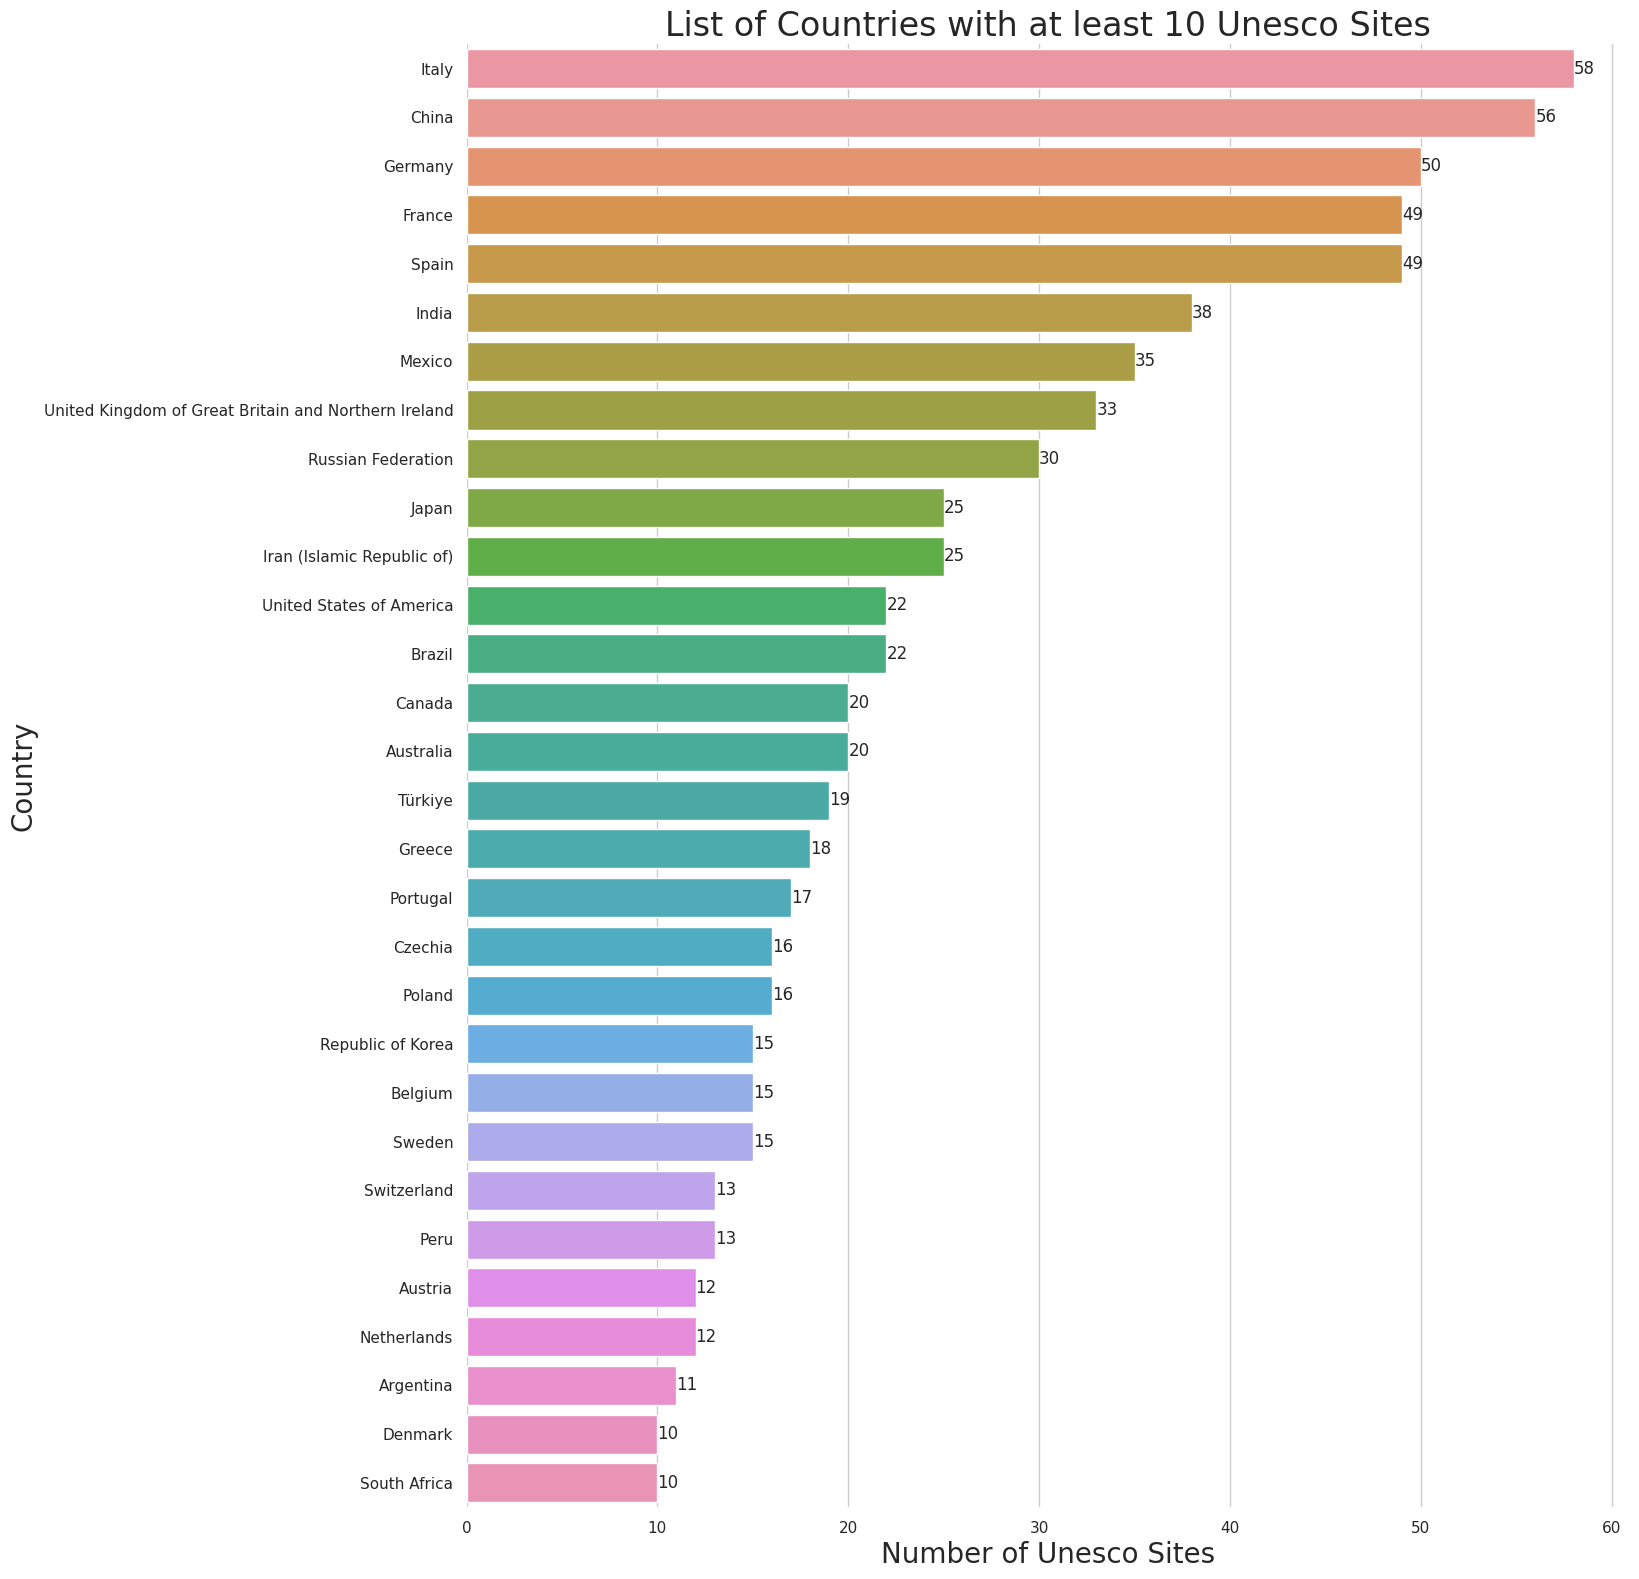

In [86]:
risultati1=df_split.loc[(df_split['count_sites']>=10)].sort_values(by=['count_sites'], ascending=False)

#plot
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 19))

ax = sns.barplot(x='count_sites', y='states_name_en', data=risultati1)
ax.bar_label(ax.containers[0])
ax.set_xlabel("Number of Unesco Sites",fontsize=20)
ax.set_ylabel("Country",fontsize=20)
ax.set_title("List of Countries with at least 10 Unesco Sites", fontsize=24)
sns.despine(left=True, bottom=True)


In [87]:
ris1 = risultati1.loc[ (risultati1.count_sites == max(risultati1.count_sites))]
#ris1

print( f"The country with the highest number of Unesco Sites is: {ris1.states_name_en.unique()[0]}, with {max(risultati1.count_sites)} sites.")

The country with the highest number of Unesco Sites is: Italy, with 58 sites.


Which country/countries have the lowest number of registered sites?

In [88]:
min_sites=min(df_split['count_sites'])
print(f"Il numero minimo di siti Unesco per Paese e' {min_sites}.")

Il numero minimo di siti Unesco per Paese e' 1.


In [89]:
risultati2=df_split.loc[df_split['count_sites']==min(df_split['count_sites'])]

Table1=pd.DataFrame(risultati2, columns=['states_name_en','count_sites'])
blankIndex=[''] * len(Table1)
Table1.index=blankIndex
Table1.set_axis(['Country', 'Number of Unesco Sites'], axis='columns', inplace=True)
Table1

,Country,Number of Unesco Sites
,Andorra,1
,Angola,1
,Antigua and Barbuda,1
,Barbados,1
,Cabo Verde,1
,Dominica,1
,Dominican Republic,1
,El Salvador,1
,Eritrea,1
,Fiji,1


In [90]:
print(f"There are {len(Table1)} countries with only one Unesco site (see previous table).")

There are 37 countries with only one Unesco site (see previous table).


How many sites are in danger?

In [91]:
df_end.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1114 entries, 0 to 1153
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name_en         1114 non-null   object 
 1   date_inscribed  1114 non-null   int64  
 2   danger          1114 non-null   int64  
 3   longitude       1114 non-null   float64
 4   latitude        1114 non-null   float64
 5   category        1114 non-null   object 
 6   states_name_en  1114 non-null   object 
 7   transboundary   1114 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 78.3+ KB


In [92]:
tab_dng=df_end['danger'].value_counts().to_frame().reset_index().rename(columns={'index':'Danger level', 'danger':'Count'})

map2={0:'Not in danger', 1:'In danger'}
tab_dng['Danger level']=tab_dng['Danger level'].map(map2)
tab_dng

tab_dng

,Danger level,Count
0,Not in danger,1066
1,In danger,48


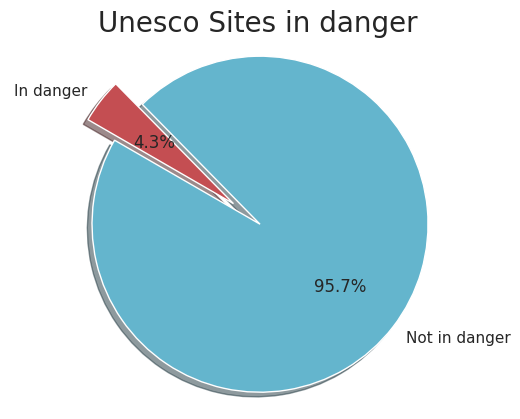

In [93]:
labels=tab_dng['Danger level']
my_explode = (0.1, 0.1)
Colours= ['c','r']
plt.pie (tab_dng.Count,  explode=my_explode,labels=labels, colors=Colours, autopct='%1.1f%%', shadow=True, startangle=150)
plt.axis ('equal')
plt.title ('Unesco Sites in danger', fontsize=20)
plt.show ()

Where are the sites in danger?

In [94]:
risultati5=df_end.loc[(df_end['danger']==1),:]
#risultati5['danger'].unique()



In [95]:
Table4=pd.DataFrame(risultati5, columns=['name_en','category','states_name_en'])
blankIndex=[''] * len(Table4)
Table4.index=blankIndex
Table4.set_axis(['Site Name','Category', 'Country'], axis='columns', inplace=True)
Table4


,Site Name,Category,Country
,Cultural Landscape and Archaeological Remains ...,Cultural,Afghanistan
,Minaret and Archaeological Remains of Jam,Cultural,Afghanistan
,Historic Centre of Vienna,Cultural,Austria
,City of Potosí,Cultural,Bolivia (Plurinational State of)
,Manovo-Gounda St Floris National Park,Natural,Central African Republic
,Virunga National Park,Natural,Democratic Republic of the Congo
,Kahuzi-Biega National Park,Natural,Democratic Republic of the Congo
,Okapi Wildlife Reserve,Natural,Democratic Republic of the Congo
,Abu Mena,Cultural,Egypt
,Tropical Rainforest Heritage of Sumatra,Natural,Indonesia


Let's visualize them on map.

In [96]:
from folium.plugins import MarkerCluster



def createMap( default_location=(0,0), default_zoom_start=2):
  return folium.Map( location=default_location, zoom_start=default_zoom_start, control_scale=False)

mc = MarkerCluster()
mappa = createMap()


for index, row in risultati5.iterrows():
  mc.add_child( folium.Marker(
      location = (row.latitude, row.longitude),
      popup = row["name_en"]
  ))

mappa.add_child( mc )


mappa

Counting the sites in danger for each country.

In [97]:
danger_country=Table4['Country'].value_counts().to_frame().reset_index().rename(columns={'index':'Country', 'Country':'Count'})

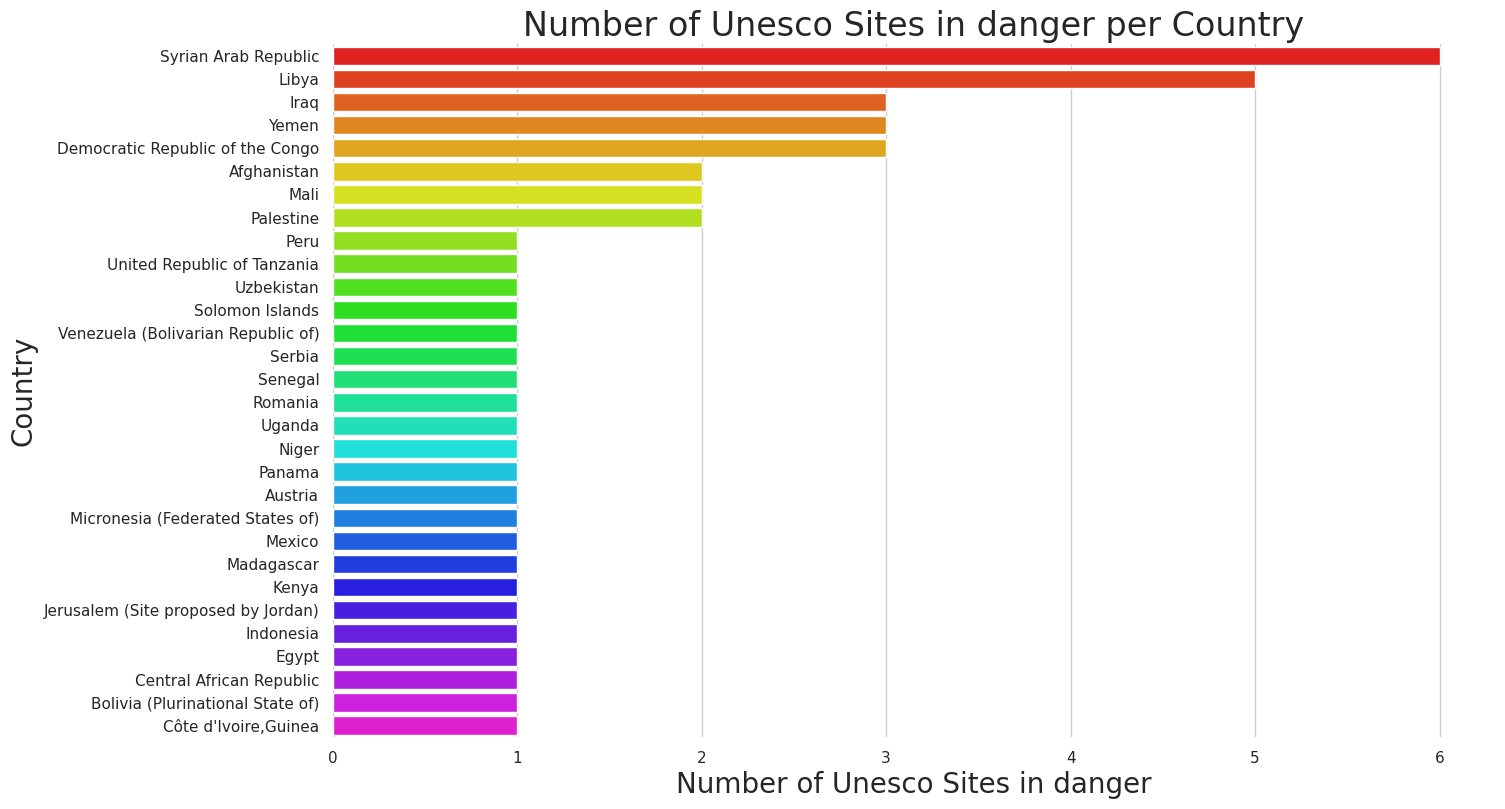

In [98]:
#plot
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 9))

ax = sns.barplot(y='Country', x='Count', data=danger_country, palette='gist_rainbow')
ax.set_ylabel("Country",fontsize=20)
ax.set_xlabel("Number of Unesco Sites in danger",fontsize=20)
ax.set_title("Number of Unesco Sites in danger per Country", fontsize=24)
sns.despine(left=True, bottom=True)


To which category these sites belong?

In [99]:
Table4['Category'].value_counts().to_frame().reset_index().rename(columns={'index':'Category', 'Category':'Count'})


,Category,Count
0,Cultural,35
1,Natural,13


Top 5 countries for Unesco sites.

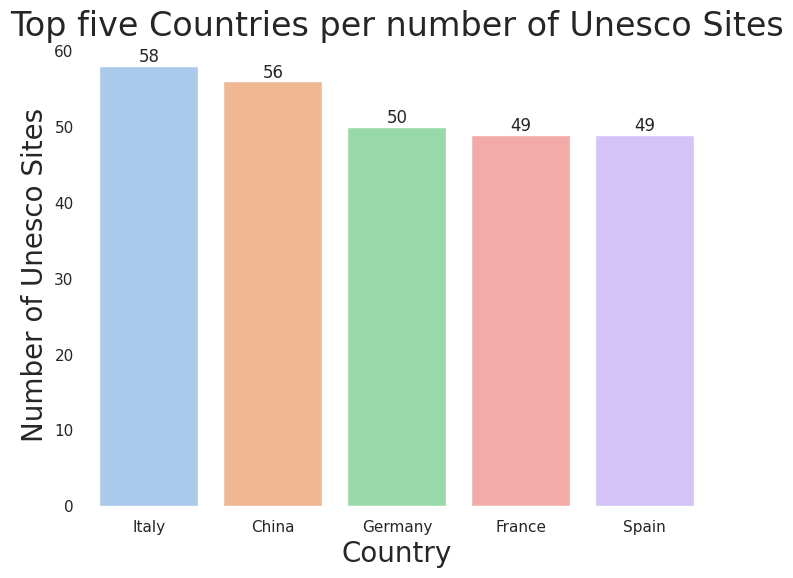

In [100]:
risultati6=df_split.loc[(df_split['count_sites']>48)].sort_values(by=['count_sites'], ascending=False)

#plot
sns.set_theme(style="white")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8,6))

ax = sns.barplot(y='count_sites', x='states_name_en', data=risultati6, palette=sns.color_palette('pastel'))
ax.bar_label(ax.containers[0])
ax.set_ylabel("Number of Unesco Sites",fontsize=20)
ax.set_xlabel("Country",fontsize=20)
ax.set_title("Top five Countries per number of Unesco Sites", fontsize=24)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=0,
    horizontalalignment='center'
)
sns.despine(left=True, bottom=True)

In [101]:
group_count=df_split.groupby(["states_name_en", "count_sites"] , as_index = False).sum().sort_values(by='count_sites',ascending=False)
group_count

TableTop5=pd.DataFrame(group_count.iloc[0:5,0:2])
blankIndex=[''] * len(TableTop5)
TableTop5.index=blankIndex
TableTop5.set_axis(['Country', 'Number of Unesco Sites'], axis='columns', inplace=True)
TableTop5


,Country,Number of Unesco Sites
,Italy,58
,China,56
,Germany,50
,Spain,49
,France,49


Let's visualize now on map all the Unesco sites registered in 2021.

In [102]:

from folium.plugins import MarkerCluster



def createMap( default_location=(0,0), default_zoom_start=2):
  return folium.Map( location=default_location, zoom_start=default_zoom_start, control_scale=False)

mc = MarkerCluster()
mappa = createMap()


for index, row in df_end.iterrows():
  mc.add_child( folium.Marker(
      location = (row.latitude, row.longitude),
      popup = row["name_en"]
  ))

mappa.add_child( mc )


mappa

Heat map.

In [103]:
from folium.plugins import HeatMap

def createMap( default_location=(0,0), default_zoom_start=2):
  return folium.Map( location=default_location, zoom_start=default_zoom_start, control_scale=False)

In [104]:
map = createMap()


In [105]:
datamap = df_end[ [ 'latitude', 'longitude' ] ].copy()
datamap["count"] = 1

In [106]:
datamap_gb = datamap.groupby( ['latitude', 'longitude' ] ).sum()

datamap_gb.reset_index()

,latitude,longitude,count
0,-54.594722,158.895556,1
1,-53.100000,73.500000,1
2,-50.750000,166.104444,1
3,-50.000000,-73.249440,1
4,-49.380361,69.352806,1
...,...,...,...
1109,67.333330,17.583330,1
1110,69.046944,94.158056,1
1111,69.133333,-49.500000,1
1112,69.950000,23.183330,1


In [107]:
data_map_list = datamap_gb.reset_index()
data_map_list = data_map_list.values.tolist()

In [108]:
HeatMap( data=data_map_list, radius=12, max_zoom=18).add_to(map)

In [109]:
map

By using HeatMapWithTime, I will now show the Unesco sites registered each year, from 1978 to 2021.

In [110]:
years = df_2.date_inscribed.copy().sort_values().unique()

In [111]:
years_list = []

for year in years :
  site_in_year = df_2[ df_2.date_inscribed == year ].copy()
  site_in_year = site_in_year[ ["latitude", "longitude"] ]
  site_in_year["count"] = 1
  site_in_year = site_in_year.groupby(  ["latitude", "longitude"] ).sum().reset_index().values.tolist()
  years_list.append( site_in_year )


In [112]:
from folium.plugins import HeatMapWithTime
mappa = createMap()
HeatMapWithTime( data= years_list, radius=12).add_to( mappa )


mappa

Let's now group the sites by year of registration.


In [113]:
df_2['count_year'] = df_2.groupby('date_inscribed')['date_inscribed'].transform('count')
df_2

,name_en,date_inscribed,danger,date_end,longitude,latitude,category,states_name_en,transboundary,count_year
0,Cultural Landscape and Archaeological Remains ...,2003,1,NaN,67.825250,34.846940,Cultural,Afghanistan,0,24
1,Minaret and Archaeological Remains of Jam,2002,1,NaN,64.515889,34.396417,Cultural,Afghanistan,0,9
2,Historic Centres of Berat and Gjirokastra,2005,0,NaN,20.140833,40.074167,Cultural,Albania,0,24
3,Butrint,1992,0,2005.0,20.020950,39.745732,Cultural,Albania,0,20
4,Al Qal'a of Beni Hammad,1980,0,NaN,4.786840,35.818440,Cultural,Algeria,0,27
...,...,...,...,...,...,...,...,...,...,...
1149,Landscapes of Dauria,2017,0,NaN,115.425444,49.930222,Natural,"Mongolia,Russian Federation",1,21
1150,Wooden <em>Tserkvas</em> of the Carpathian Reg...,2013,0,NaN,21.032222,49.533889,Cultural,"Poland,Ukraine",1,19
1151,Prehistoric Rock Art Sites in the Côa Valley a...,1998,0,NaN,-6.661111,40.697500,Cultural,"Portugal,Spain",1,30
1152,Heritage of Mercury. Almadén and Idrija,2012,0,NaN,-4.838889,38.775278,Cultural,"Slovenia,Spain",1,26


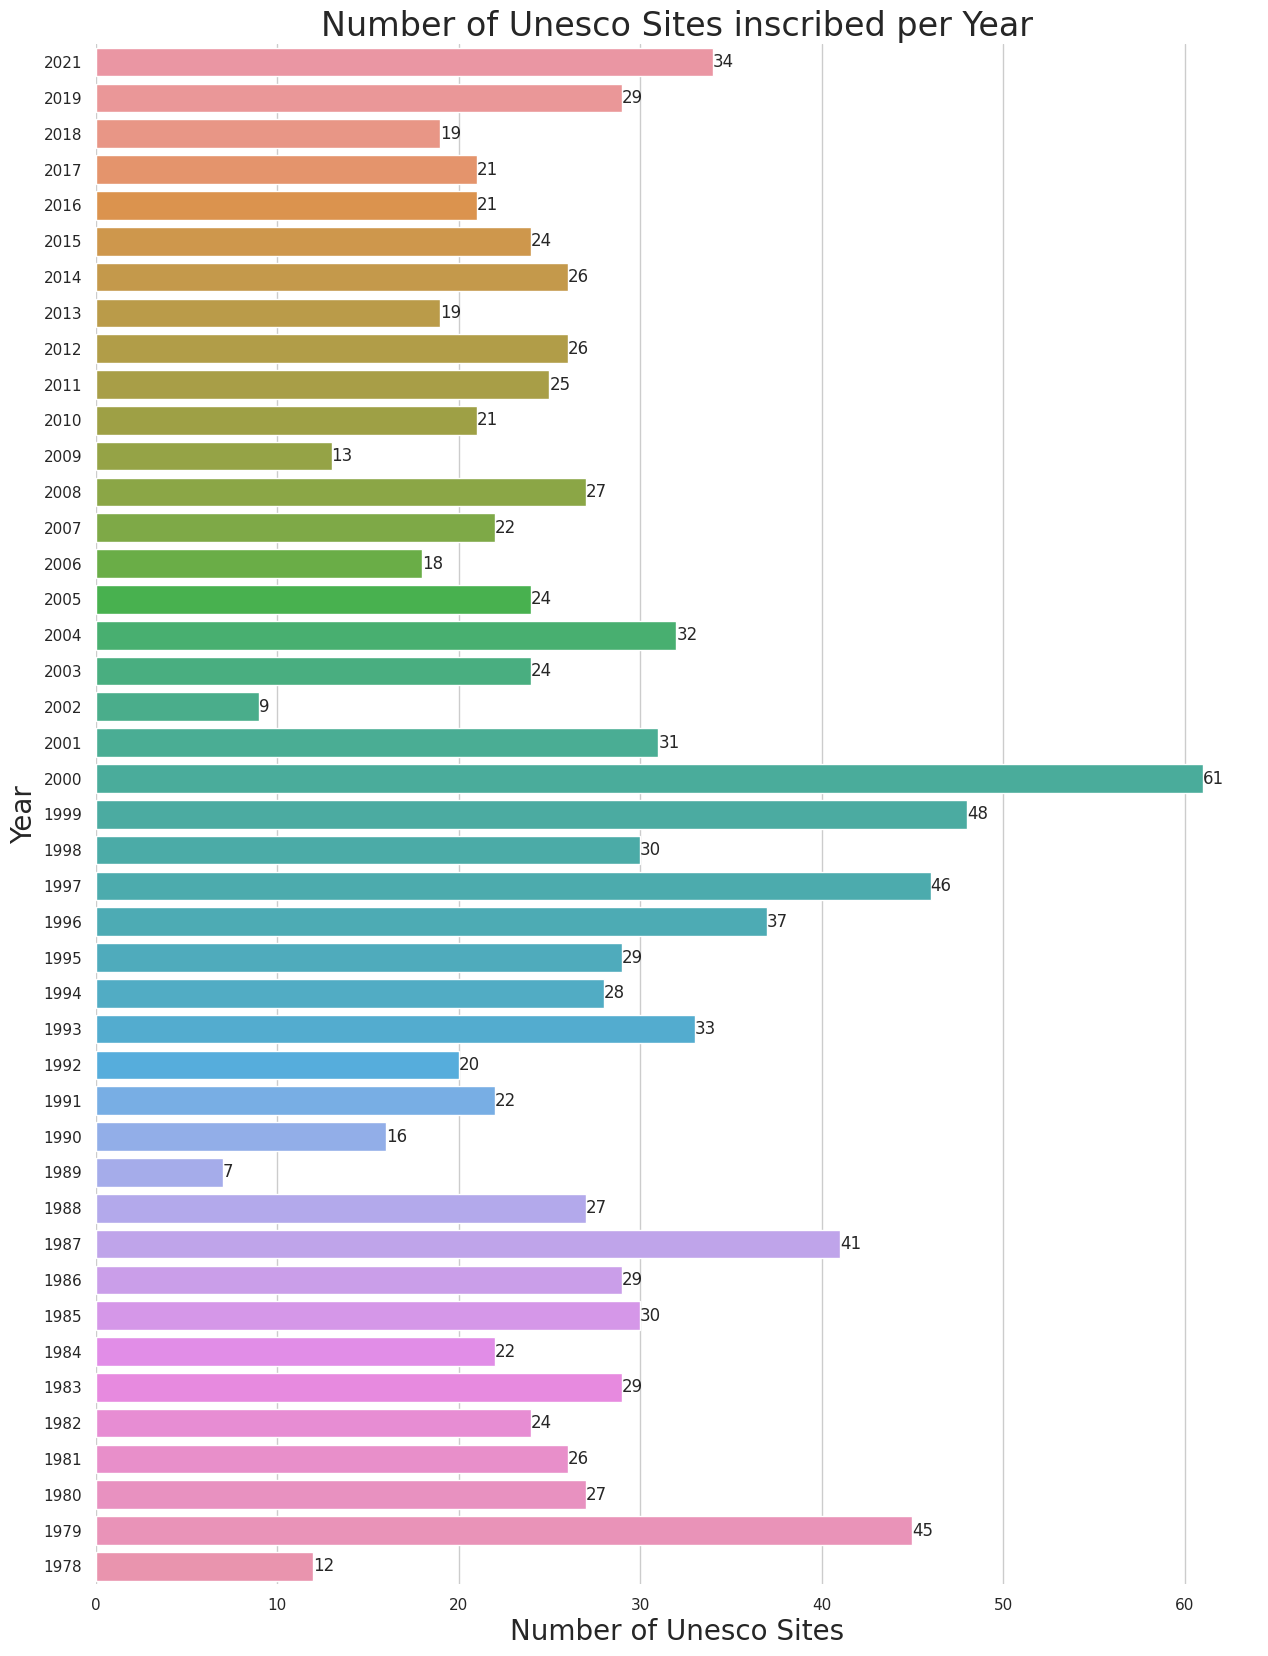

In [114]:
risultati7=df_2.sort_values(by=['date_inscribed'], ascending=False)

#plot
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 20))

ax = sns.barplot(y=(risultati7['date_inscribed'].astype(str)),x='count_year', data=risultati7)
ax.bar_label(ax.containers[0])
ax.set_xlabel("Number of Unesco Sites",fontsize=20)
ax.set_ylabel("Year",fontsize=20)
ax.set_title("Number of Unesco Sites inscribed per Year", fontsize=24)
sns.despine(left=True, bottom=True)

In [115]:
group_count2=df_2.groupby(["date_inscribed", "count_year"] , as_index = False).sum().sort_values(by='date_inscribed',ascending=False)

Table5=pd.DataFrame(group_count2, columns=["date_inscribed", "count_year"])
blankIndex=[''] * len(Table5)
Table5.index=blankIndex
Table5.set_axis(['Year', 'Number of Unesco Sites'], axis='columns', inplace=True)
Table5


,Year,Number of Unesco Sites
,2021,34
,2019,29
,2018,19
,2017,21
,2016,21
,2015,24
,2014,26
,2013,19
,2012,26
,2011,25


We can calculate the year in which the highest number of sites were registered.

In [116]:
ris2 = risultati7.loc[ (risultati7.count_year == max(risultati7.count_year))]
ris2

AnnoMax=ris2.date_inscribed.unique()[0]


print( f"The year in which the highest number of site were registered is {AnnoMax}, with {max(risultati7.count_year)} registered sites.")

The year in which the highest number of site were registered is 2000, with 61 registered sites.


let's visualize on map where the sites were registered in 2000.

In [117]:
Table10=pd.DataFrame(ris2, columns=["name_en", "category", "states_name_en", "date_inscribed"])
blankIndex=[''] * len(Table10)
Table10.index=blankIndex
Table10.set_axis(['Name',  'Category','Country','Year'], axis='columns', inplace=True)
Table10


,Name,Category,Country,Year
,"Assisi, the Basilica of San Francesco and Othe...",Cultural,Italy,2000
,Kronborg Castle,Cultural,Denmark,2000
,Pantanal Conservation Area,Natural,Brazil,2000
,"Three Castles, Defensive Wall and Ramparts of ...",Cultural,Switzerland,2000
,Agricultural Landscape of Southern Öland,Cultural,Sweden,2000
...,...,...,...,...
,Isole Eolie (Aeolian Islands),Natural,Italy,2000
,Historic Centre of Brugge,Cultural,Belgium,2000
,Walled City of Baku with the Shirvanshah's Pal...,Cultural,Azerbaijan,2000
,Wachau Cultural Landscape,Cultural,Austria,2000


Rappresentiamo ora questi siti su mappa.

In [118]:

from folium.plugins import MarkerCluster


mc = MarkerCluster()
mappa = createMap() #funzione gia' definita in precedenza


for index, row in ris2.iterrows():
  mc.add_child( folium.Marker(
      location = (row.latitude, row.longitude),
      popup = row["name_en"]
  ))

mappa.add_child( mc )


mappa

The Unesco sites are divided by category. We can find them.

In [119]:
df_end.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1114 entries, 0 to 1153
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name_en         1114 non-null   object 
 1   date_inscribed  1114 non-null   int64  
 2   danger          1114 non-null   int64  
 3   longitude       1114 non-null   float64
 4   latitude        1114 non-null   float64
 5   category        1114 non-null   object 
 6   states_name_en  1114 non-null   object 
 7   transboundary   1114 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 78.3+ KB


In [120]:
cat=df_end['category'].value_counts().to_frame().reset_index().rename(columns={'index':'Category', 'category':'Count'})
cat

,Category,Count
0,Cultural,876
1,Natural,200
2,Mixed,38


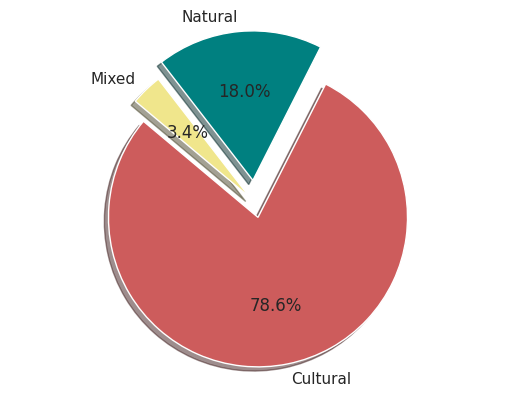

In [121]:
labels=cat.Category
my_explode = (0.1, 0.15, 0.05)
Colours= ['indianred','teal','khaki']
plt.pie (cat.Count,  explode=my_explode,labels=labels, colors=Colours, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis ('equal')
plt.show ()

Let's take Italy and Vatican City as example. How many sites they have and to which category they belong?



ITALY

In [122]:
tot=len(df_split.loc[df_split.states_name_en=='Italy'])

print(f"Italy has {tot} Unesco Sites.")

Italy has 58 Unesco Sites.


In [123]:
ita=df_split.loc[df_split.states_name_en=='Italy']
ita

tab_ita=ita['category'].value_counts().to_frame().reset_index().rename(columns={'index':'Category', 'category':'Count'})
tab_ita

,Category,Count
0,Cultural,53
1,Natural,5


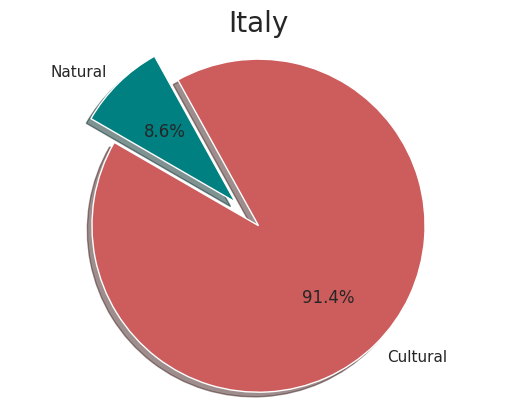

In [124]:
labels=tab_ita.Category
my_explode = (0.1, 0.1)
Colours= ['indianred','teal']
plt.pie (tab_ita.Count,  explode=my_explode,labels=labels, colors=Colours, autopct='%1.1f%%', shadow=True, startangle=150)
plt.axis ('equal')
plt.title ('Italy', fontsize=20)
plt.show ()

Shared sitesfor Italy.

In [125]:
ita2=df_2.loc[df_2.states_name_en.str.contains('Italy') &
                  df_2.transboundary==1]
#ita2


In [126]:
tab_ita2=ita2['category'].value_counts().to_frame().reset_index().rename(columns={'index':'Category', 'category':'Count'})
tab_ita2

,Category,Count
0,Cultural,5
1,Natural,2


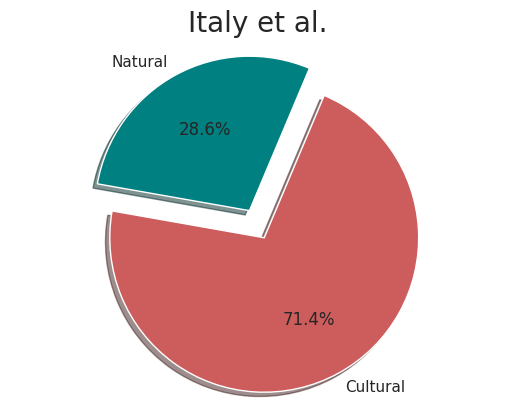

In [127]:
labels=tab_ita2.Category
my_explode = (0.1, 0.1)
Colours= ['indianred','teal']
plt.pie (tab_ita2.Count,  explode=my_explode,labels=labels, colors=Colours, autopct='%1.1f%%', shadow=True, startangle=170)
plt.axis ('equal')
plt.title ('Italy et al.', fontsize=20)
plt.show ()

In [128]:
ita2[['name_en','states_name_en']]


,name_en,states_name_en
1111,Ancient and Primeval Beech Forests of the Carp...,"Albania,Austria,Belgium,Bosnia and Herzegovina..."
1116,The Great Spa Towns of Europe,"Austria,Belgium,Czechia,France,Germany,Italy,U..."
1117,Prehistoric Pile Dwellings around the Alps,"Austria,France,Germany,Italy,Slovenia,Switzerland"
1132,Venetian Works of Defence between the 16th and...,"Croatia,Italy,Montenegro"
1141,"Historic Centre of Rome, the Properties of the...","Holy See,Italy"
1143,Monte San Giorgio,"Italy,Switzerland"
1144,Rhaetian Railway in the Albula / Bernina Lands...,"Italy,Switzerland"


Vatican City.

In [129]:
tot3=len(df_split.loc[df_split.states_name_en=='Holy See'])

print(f"Vatican City has {tot3} Unesco Sites.")

Vatican City has 2 Unesco Sites.


In [130]:
vatc=df_split.loc[(df_split.states_name_en=='Holy See')]
vatc

tab_vatc=vatc['category'].value_counts().to_frame().reset_index().rename(columns={'index':'Category', 'category':'Count'})
tab_vatc

,Category,Count
0,Cultural,2


In [131]:
print(f"The {tab_vatc.Count[0]} Unesco sites in Vatican City belongs to the category {tab_vatc.Category[0]}.")

The 2 Unesco sites in Vatican City belongs to the category Cultural.


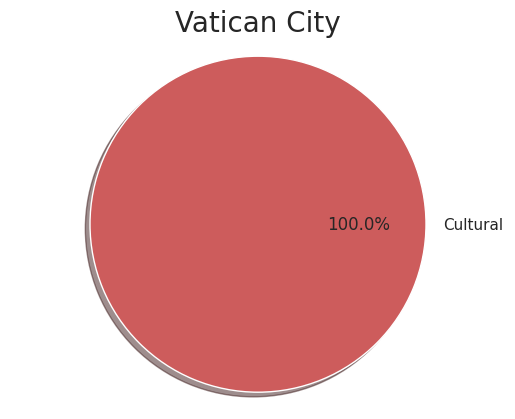

In [132]:
labels=tab_vatc.Category

Colours= ['indianred']
plt.pie (tab_vatc.Count, labels=labels, colors=Colours, autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis ('equal')
plt.title ('Vatican City', fontsize=20)
plt.show ()

The site present in Vatican City is:

In [133]:
vatc1=df_split.loc[(df_split.states_name_en=='Holy See') &
                (df_split.transboundary==0)]
#vatc1


The other site in shared with some other country. Which one?

In [134]:
vatc2=df_end.loc[df_end.states_name_en.str.contains('Holy See',  case=False) &
              df_end.transboundary==1]
#vatc2

shared_with=vatc2.states_name_en.str.split(',').str[1]
#shared_with

In [135]:
print(f"Vatican City has {len(vatc2)} site shared with {shared_with.values[0]}. This site is \n{vatc2.name_en.values[0]}.")

Vatican City has 1 site shared with Italy. This site is 
Historic Centre of Rome, the Properties of the Holy See in that City Enjoying Extraterritorial Rights and San Paolo Fuori le Mura.
